#regularization is use to improve model 
#y=200x1 + 500x2 + 0.5x3 + 0.005x4           
#200x1 + 500x2 reduce the coefficient value for avoid overfitting problem  
#Lasso Regularization /L1   
#Ridge Regularization /L2

### Lasso Regularization /L1
It work for feature selection 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("Housing.csv")

In [5]:
data.head(5)

,area,bedrooms,bathroom,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,11410000


In [7]:
data.isnull().sum()

area               0
bedrooms           0
bathroom           0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
price              0
dtype: int64

In [9]:
en_data=data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]

In [11]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   mainroad_no          545 non-null    bool 
 1   mainroad_yes         545 non-null    bool 
 2   guestroom_no         545 non-null    bool 
 3   guestroom_yes        545 non-null    bool 
 4   basement_no          545 non-null    bool 
 5   basement_yes         545 non-null    bool 
 6   hotwaterheating_no   545 non-null    bool 
 7   hotwaterheating_yes  545 non-null    bool 
 8   airconditioning_no   545 non-null    bool 
 9   airconditioning_yes  545 non-null    bool 
 10  prefarea_no          545 non-null    bool 
 11  prefarea_yes         545 non-null    bool 
dtypes: bool(12)
memory usage: 6.5 KB


In [13]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe= OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data).toarray()
ar

array([[1., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [17]:
encod_data=pd.DataFrame(ar,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'])

In [19]:
encod_data

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0
541,0.0,0.0,0.0,0.0,0.0,0.0
542,1.0,0.0,0.0,0.0,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
final_data=pd.concat([data.drop(columns=en_data.columns), encod_data], axis=1)

In [23]:
final_data.head(5)

,area,bedrooms,bathroom,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,7420,4,2,3,2,13300000,1.0,0.0,0.0,0.0,1.0,1.0
1,8960,4,4,4,3,12250000,1.0,0.0,0.0,0.0,1.0,0.0
2,9960,3,2,2,2,12250000,1.0,0.0,1.0,0.0,0.0,1.0
3,7500,4,2,2,3,12215000,1.0,0.0,1.0,0.0,1.0,1.0
4,7420,4,1,2,2,11410000,1.0,1.0,1.0,0.0,1.0,0.0


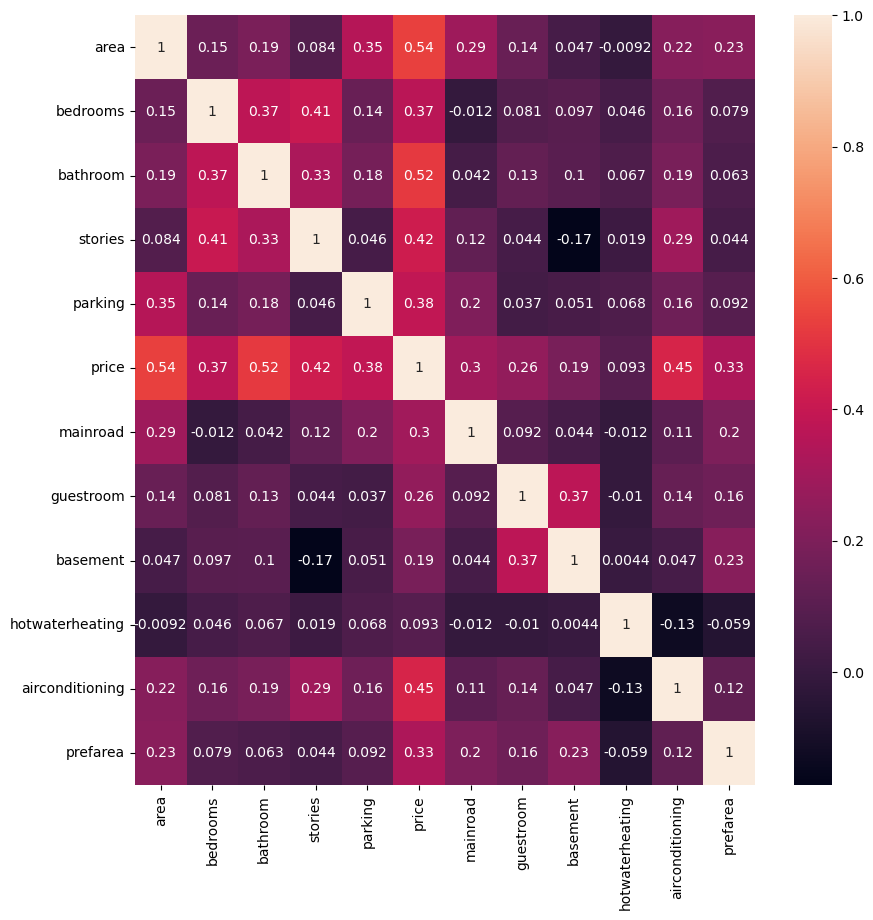

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data=final_data.corr(),annot=True)
plt.show()

In [26]:
#data.drop(columns=['price'])
X=final_data.drop(columns=["price"])
Y=data["price"]

In [29]:
sc= StandardScaler()
sc.fit(X)
X=pd.DataFrame(sc.transform(X),columns=X.columns)

In [31]:
X

,area,bedrooms,bathroom,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941
1,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035


In [33]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

## Linear Regression

In [39]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test) *100

64.37296086614109

In [66]:
print(mean_squared_error(Y_test,lr.predict(X_test)))
print(mean_absolute_error(Y_test,lr.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test,lr.predict(X_test))))

1800793719718.9717
979112.2162187382
1341936.5557726533


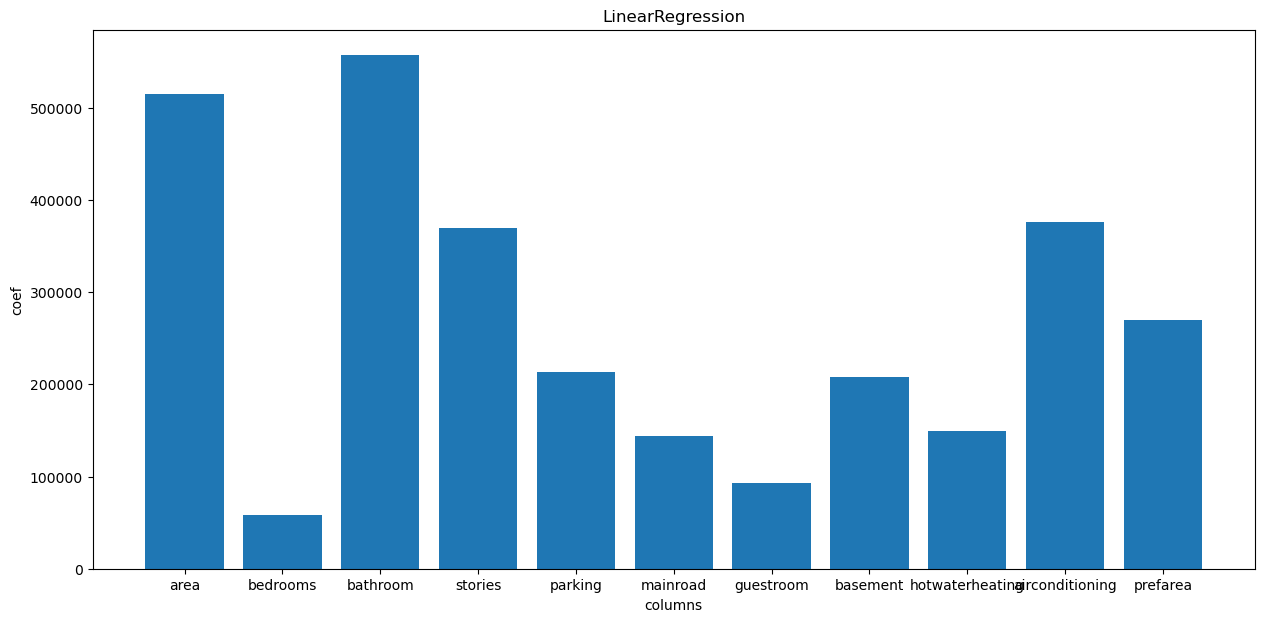

In [41]:
plt.figure(figsize=(15,7))
plt.bar(X.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

## Lasso

In [44]:
la=Lasso(alpha=0.01)
la.fit(X_train,Y_train)
la.score(X_test,Y_test)*100

64.3729605301089

In [68]:
print(mean_squared_error(Y_test,la.predict(X_test)))
print(mean_absolute_error(Y_test,la.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test,la.predict(X_test))))

1800793736703.9543
979112.221044183
1341936.5621011874


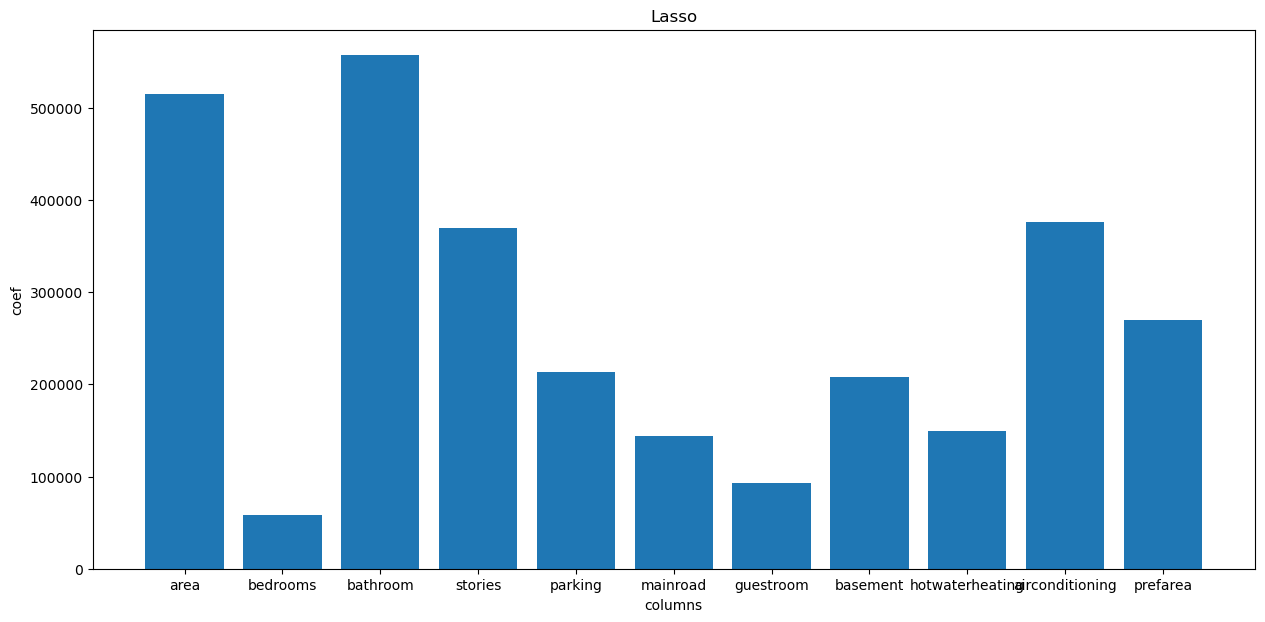

In [46]:
plt.figure(figsize=(15,7))
plt.bar(X.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

## Ridge

In [49]:
#alpha value is help to avoid overfitting problem  and its reduce coef value
ri=Ridge(alpha=1.0)      
ri.fit(X_train,Y_train)
ri.score(X_test,Y_test)*100

64.36275714921156

In [70]:
print(mean_squared_error(Y_test,ri.predict(X_test)))
print(mean_absolute_error(Y_test,ri.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test,ri.predict(X_test))))

1801309473758.9138
979114.6251700001
1342128.709833343


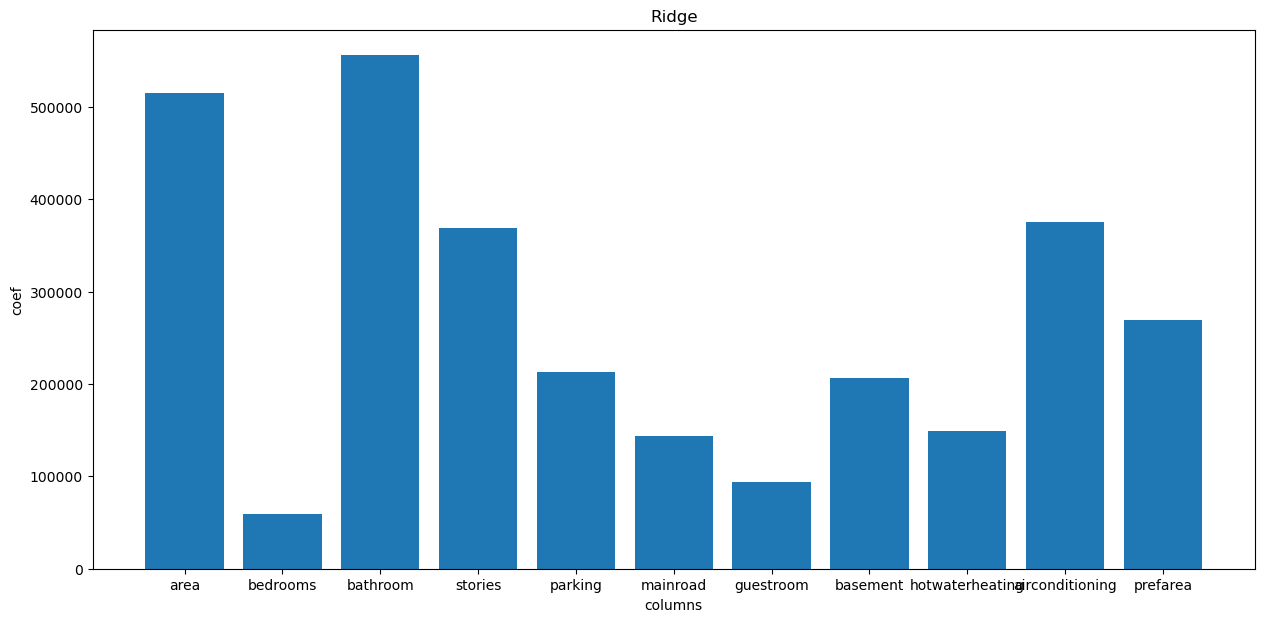

In [51]:
plt.figure(figsize=(15,7))
plt.bar(X.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [74]:
df= pd.DataFrame({"col_name":X.columns,"LinearRegression":lr.coef_,"lasso":la.coef_,"Ridge":ri.coef_})

In [76]:
df

,col_name,LinearRegression,lasso,Ridge
0,area,515391.840481,515391.838439,514429.304696
1,bedrooms,57872.776436,57872.773995,58804.618019
2,bathroom,556891.067242,556891.063119,555669.478204
3,stories,370000.899864,370000.893583,369156.803771
4,parking,212997.799147,212997.794561,213077.509621
5,mainroad,143741.723580,143741.718466,143970.150589
6,guestroom,93178.807282,93178.803128,93553.490675
7,basement,207547.046639,207547.040092,206944.998735
8,hotwaterheating,149010.395051,149010.385493,148681.605072
9,airconditioning,375713.439539,375713.435255,375329.796184
